## Домашнее задание

#### 1. В чём различие между зависимыми и независимыми выборками?

Ответ.
Если в одной выборке есть запись которой однозначно соотвествует запись во второй выборке то такие выборки являются зависимыми, в противном случае выборки независимы. 
То есть если в первой выборке есть муж у которго есть жена во второй выборке то эти выборки зависимы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import warnings
from scipy.stats import probplot
warnings.simplefilter('ignore')

#### 2. Когда применяются параметрические статистические критерии, а когда их непараметрические аналоги?

Ответ. <br>
   Параметрические критерии применяются когда выборки, выбранные для сравнения, имеют нормальное распределение. T-критерий Стьюдента, оценивающий различие средних F-критерий Фишера, оценивающий различие дисперсий. 
<br>
Непараметрические критерии не основываются ни на каких вычисляемых параметрах (среднее, креднее квадратичное, дисперсия) и применяется при любом типе распределения выборки. U-критерий Манна-Уитни использует ранжирование и попарное сравнение элементов двух выборок.

## Задания по курсовому проекту (*)

#### 1. Из всех количественных признаков есть ли распределенные нормально? Будут ли они распределены нормально после логарифмизации?

In [2]:
train_df = pd.read_csv('H:\\GeekBrains\Основное обучение\\II четверть\\Библиотеки Python для Data Science продолжение\\Урок 1. Введение в задачу классификации. Постановка задачи и подготовка данных\\course_project\\course_project_train.csv')


Проверим гипотезу для столбцов типа float64
* H0: признак распределён нормально.
* H1: признак не подчиняется закону нормального распределения.
* Критерий: Шапиро-Уилка
* $\alpha=0.05$
* Критическая область: двухсторонняя

In [3]:
for col in train_df.loc[:, train_df.dtypes == np.float64].columns:
    s, p = shapiro(train_df[col])

    if p > 0.05:
        print(f"Распределение {col} является нормальным")


Распределение Annual Income является нормальным
Распределение Months since last delinquent является нормальным
Распределение Bankruptcies является нормальным
Распределение Credit Score является нормальным


Странно что Шапиро-Уилка подтверждает гипотезу о нормальном распределении, например, для признака "Annual Income" при том что график явно не нормальный. Как тогда выбирать критерий для оценки отличия в распределениях признаков в датасетах train и test?

Значение Shapiro для Annual Income: 1.0


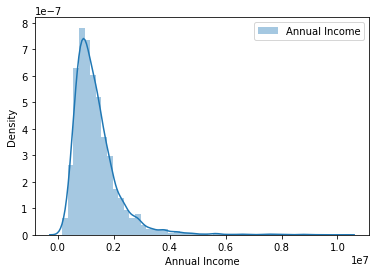

In [4]:
s, p = shapiro(train_df['Annual Income'])
print(f"Значение Shapiro для Annual Income: {p}")
sns.distplot(train_df['Annual Income'], label='Annual Income')
plt.legend();

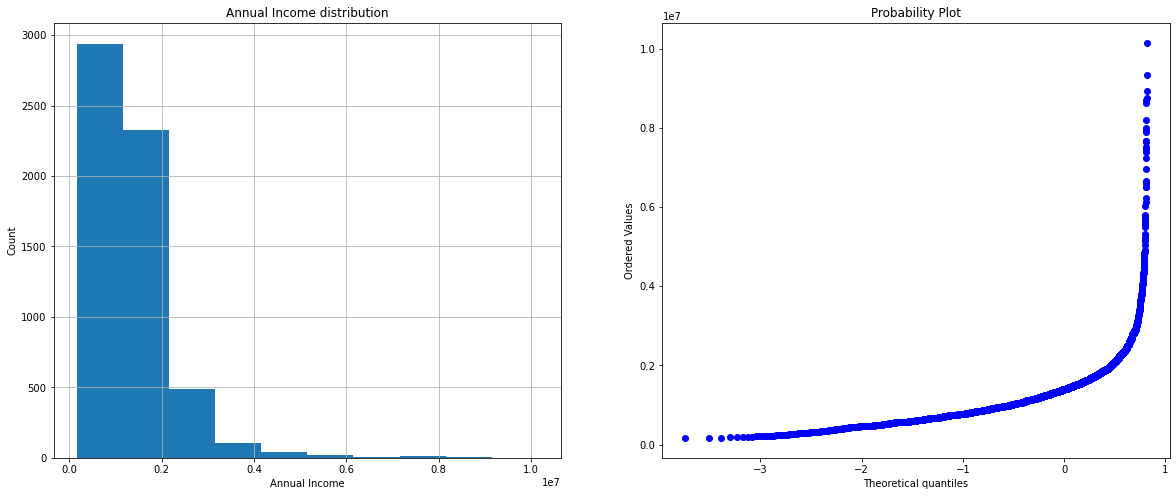

In [5]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Count')
ax1.set_title('Annual Income distribution')
train_df['Annual Income'].hist()

plt.subplot(122)
probplot(train_df['Annual Income'], dist='norm', plot=plt)

plt.show()

In [6]:
train_df.loc[train_df['Annual Income'].isna() == True, 'Annual Income'].count()

0